In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, sys, shutil

In [2]:
workspace = '/data/ChaochaoData/DSA-DL/HyperMorph/Comparison/'
sample_dir = os.path.join(workspace, 'test_samples_fixed')
eval_dir = os.path.join(workspace, 'test_rankings')

In [3]:
filename = 'RobbieRankings.xlsx'
# filename = 'AnsariRankings.xlsx'
# filename = 'RamezRankings.xlsx'

filepath = os.path.join(eval_dir, filename)
df = pd.read_excel(filepath)
df

,Case,Rank 1,Rank 2,Rank 3,Rank 4,Weird Artifacts
0,1,TR,BL,BR,TL,NaN
1,4,BL,TR,TL,BR,NaN
2,9,TL,BR,TR,BL,NaN
3,14,BR,TR,TL,BL,NaN
4,21,BL,TL,BR,TR,BR
5,24,BL,TR,TL,BR,NaN
6,25,BL,BR,TL,TR,TR
7,26,BL,TR,BR,TL,NaN
8,27,BR,BL,TR,TL,NaN
9,28,BL,TL,TR,BR,NaN


In [4]:
df_idx = df.replace({'TL': 0, 'TR': 1, 'BL': 2, 'BR': 3})
df_idx

case_num = df_idx['Case']
rank_idx = df_idx.iloc[:, 1:6]

def decoding(k, pool_order):
    if not np.isnan(k):
        return pool_order[int(k)]
    else:
        return -1
    
N_case = len(df_idx)
ranked_methods = []
for i in range(N_case):
    dst_dir = os.path.join(sample_dir, str(case_num[i]).zfill(3))
    with open(os.path.join(dst_dir, "pool_order.txt"), "r") as file:
        pool_order = [int(line) for line in file.readlines()]
    #tmp = [pool_order[k] for k in list(rank_idx.iloc[i,:])]
    tmp = [decoding(k, pool_order) for k in list(rank_idx.iloc[i,:])]
    ranked_methods.append(tmp)

ranked_methods = np.array(ranked_methods)

df_dec = df_idx.copy()
df_dec.iloc[:, 1:] = ranked_methods
df_dec

,Case,Rank 1,Rank 2,Rank 3,Rank 4,Weird Artifacts
0,1,3,1,2,0,-1
1,4,2,3,0,1,-1
2,9,3,1,2,0,-1
3,14,3,2,1,0,-1
4,21,3,2,1,0,1
5,24,3,1,2,0,-1
6,25,2,3,0,1,1
7,26,3,2,1,0,-1
8,27,3,1,2,0,-1
9,28,3,1,2,0,-1


In [5]:
n_weird = sum(df_dec.iloc[:, -1] != -1)
print(n_weird)

9


In [6]:
def DecodeRankings(rank_filename):
    filepath = os.path.join(eval_dir, rank_filename)
    df = pd.read_excel(filepath)

    df_idx = df.replace({'TL': 0, 'TR': 1, 'BL': 2, 'BR': 3})
    case_num = df_idx['Case']
    rank_idx = df_idx.iloc[:, 1:5]

    N_case = len(df_idx)
    ranked_methods = []
    for i in range(N_case):
        dst_dir = os.path.join(sample_dir, str(case_num[i]).zfill(3))
        with open(os.path.join(dst_dir, "pool_order.txt"), "r") as file:
            pool_order = [int(line) for line in file.readlines()]
        tmp = [pool_order[k] for k in list(rank_idx.iloc[i,:])]
        ranked_methods.append(tmp)

    ranked_methods = np.array(ranked_methods) 
    return ranked_methods

In [7]:
rank_filenames = ['RobbieRankings.xlsx', 'AnsariRankings.xlsx', 'RamezRankings.xlsx']

all_alg_percs = {}
for (i, fn) in enumerate(rank_filenames):
    first_ranks = DecodeRankings(fn)[:, 0]
    alg_percs = []
    for alg in range(4):
        alg_percs.append(np.sum(first_ranks==alg)/len(first_ranks) * 100)
    all_alg_percs[fn] = alg_percs

all_alg_percs

{'RobbieRankings.xlsx': [0.0, 10.0, 24.0, 66.0],
 'AnsariRankings.xlsx': [6.0, 6.0, 30.0, 57.99999999999999],
 'RamezRankings.xlsx': [8.0, 14.000000000000002, 10.0, 68.0]}

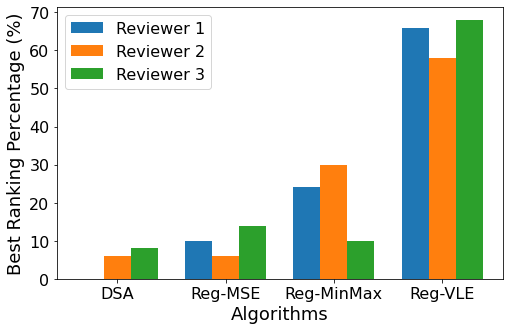

In [10]:
## Sample data
items = ['DSA', 'Reg-MSE', 'Reg-MinMax', 'Reg-VLE']
values_a = all_alg_percs['RobbieRankings.xlsx']
values_b = all_alg_percs['AnsariRankings.xlsx']
values_c = all_alg_percs['RamezRankings.xlsx']

## Number of bars for each item
n_bars = len(items)

## Setting the positions of the bars on x-axis
index = range(n_bars)
bar_width = 0.25

## Creating the bar plot
plt.figure(figsize=(8,5))
plt.bar([p - bar_width for p in index], values_a, width=bar_width, label='Reviewer 1')
plt.bar(index, values_b, width=bar_width, label='Reviewer 2')
plt.bar([p + bar_width for p in index], values_c, width=bar_width, label='Reviewer 3')

## Adding labels and title
plt.xlabel('Algorithms', fontsize=18)
plt.ylabel('Best Ranking Percentage (%)', fontsize=18)
plt.xticks([p for p in index], items, fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

## Displaying the plot
plt.show()